In [5]:
import ssl

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/Users/sumitshaw/data_science/major_project/Dataset/train'
valid_path = '/Users/sumitshaw/data_science/major_project/Dataset/test'

In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 37s 0us/step


In [7]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [10]:
  # useful for getting number of output classes
folders = glob('/Users/sumitshaw/data_science/major_project/Dataset/train/*')

In [11]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [13]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/Users/sumitshaw/data_science/major_project/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 17217 images belonging to 6 classes.


In [18]:
test_set = test_datagen.flow_from_directory('/Users/sumitshaw/data_science/major_project/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4303 images belonging to 6 classes.


In [19]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/var/folders/14/rqc987t54bg8h00cz2clbjt80000gn/T/ipykernel_22392/4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
539/539 [==============================] - 729s 1s/step - loss: 1.5951 - accuracy: 0.4986 - val_loss: 1.0203 - val_accuracy: 0.6588
Epoch 2/50
539/539 [==============================] - 783s 1s/step - loss: 1.2309 - accuracy: 0.5873 - val_loss: 1.4482 - val_accuracy: 0.5350
Epoch 3/50
539/539 [==============================] - 796s 1s/step - loss: 0.9823 - accuracy: 0.6520 - val_loss: 0.7356 - val_accuracy: 0.7011
Epoch 4/50
539/539 [==============================] - 800s 1s/step - loss: 0.9747 - accuracy: 0.6716 - val_loss: 1.8350 - val_accuracy: 0.6154
Epoch 5/50
539/539 [==============================] - 802s 1s/step - loss: 0.8790 - accuracy: 0.7023 - val_loss: 1.2029 - val_accuracy: 0.6753
Epoch 6/50
539/539 [==============================] - 802s 1s/step - loss: 0.8652 - accuracy: 0.7114 - val_loss: 0.7552 - val_accuracy: 0.7142
Epoch 7/50
539/539 [==============================] - 802s 1s/step - loss: 0.8019 - accuracy: 0.7287 - val_loss: 0.6374 - val_accuracy: 0.7716

In [20]:
import matplotlib.pyplot as plt

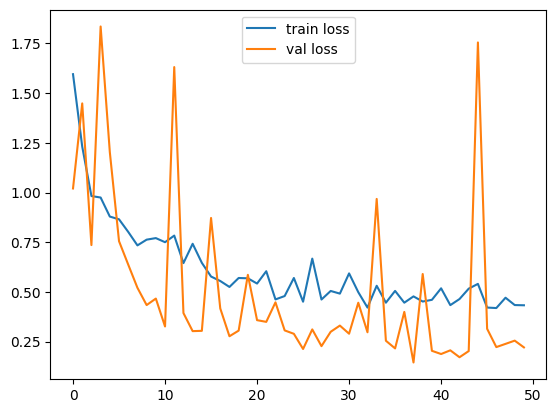

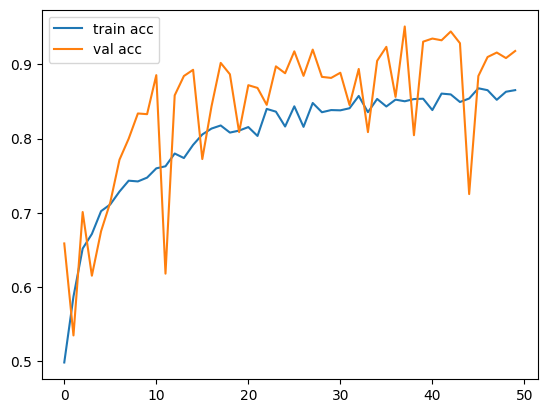

<Figure size 640x480 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')